# ECON 494 Final Thesis
#### _Univeristy of British Columbia_
 Rina Forristal, 4th Year BIE

Loading Libraries

In [86]:
import sys
!{sys.executable} -m pip install html5lib
import unittest
from typing import Tuple, Dict
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import datetime
import re
import statsmodels.api as sm
import matplotlib.ticker as mticker
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import tqdm

### Mortgage Level Data 

<a href="https://ffiec.cfpb.gov/data-browser/data/2018?category=states&items=CA&leis=549300KPHGEE40YQXO21" target="_blank">Source</a>


<a href="https://ffiec.cfpb.gov/documentation/publications/loan-level-datasets/lar-data-fields#derived_msa-md" target="_blank">LAR Data Fields</a>


In [2]:
mortgage_originations_2018 = pd.read_csv("Data/state_CA_2018.csv")
mortgage_originations_2019 = pd.read_csv("Data/state_CA_2019.csv")
mortgage_originations_2020 = pd.read_csv("Data/state_CA_2020.csv")
mortgage_originations_2021 = pd.read_csv("Data/state_CA_2021.csv")

# Merge datasets
mortgage_data = pd.concat(
    [mortgage_originations_2018, mortgage_originations_2019, mortgage_originations_2020, mortgage_originations_2021],
    ignore_index=True
)
mortgage_data.head()

C:\Users\Patron\AppData\Local\Temp\ipykernel_2300\3100568508.py:1: DtypeWarning: Columns (4,5,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  mortgage_originations_2018 = pd.read_csv("Data/state_CA_2018.csv")
C:\Users\Patron\AppData\Local\Temp\ipykernel_2300\3100568508.py:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  mortgage_originations_2019 = pd.read_csv("Data/state_CA_2019.csv")
C:\Users\Patron\AppData\Local\Temp\ipykernel_2300\3100568508.py:3: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,78,80) have mixed types. Specify dtype option on import or set low_memory=False.
  mortgage_originations_2020 = pd.read_csv("Data/state_CA_2020.csv")
C:\Users\Patron\AppData\Local\Temp\ipykernel_2300\3100568508.py:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have 

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2018,KB1H1DSPRFMYMCUFXT09,31084,CA,6037.0,6037702002.0,NC,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,6.0,2.0,NaN,6001,31.91,69300,157.0,567,1305,50
1,2018,KB1H1DSPRFMYMCUFXT09,37100,CA,6111.0,6111002800.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,6457,39.62,96000,82.0,1172,2032,57
2,2018,KB1H1DSPRFMYMCUFXT09,11244,CA,6059.0,6059110607.0,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,4530,73.73,92700,99.0,652,926,39
3,2018,KB1H1DSPRFMYMCUFXT09,44700,CA,6077.0,6077002800.0,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,5910,92.39,63700,94.0,956,1683,18
4,2018,KB1H1DSPRFMYMCUFXT09,40900,CA,6067.0,6067009328.0,NC,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,4.0,1.0,6.0,5269,67.66,80400,135.0,1317,1449,11


### GSE Loan Limit Data 
https://www.fhfa.gov/data/conforming-loan-limit?redirect= 

In [ ]:
mortgage_data.info()

In [3]:

county_data = [
    (6001, 'Alameda'), (6003, 'Alpine'), (6005, 'Amador'),
    (6007, 'Butte'), (6009, 'Calaveras'), (6011, 'Colusa'),
    (6013, 'Contra Costa'), (6015, 'Del Norte'), (6017, 'El Dorado'),
    (6019, 'Fresno'), (6021, 'Glenn'), (6023, 'Humboldt'),
    (6025, 'Imperial'), (6027, 'Inyo'), (6029, 'Kern'),
    (6031, 'Kings'), (6033, 'Lake'), (6035, 'Lassen'),
    (6037, 'Los Angeles'), (6039, 'Madera'), (6041, 'Marin'),
    (6043, 'Mariposa'), (6045, 'Mendocino'), (6047, 'Merced'),
    (6049, 'Modoc'), (6051, 'Mono'), (6053, 'Monterey'),
    (6055, 'Napa'), (6057, 'Nevada'), (6059, 'Orange'),
    (6061, 'Placer'), (6063, 'Plumas'), (6065, 'Riverside'),
    (6067, 'Sacramento'), (6069, 'San Benito'), (6071, 'San Bernardino'),
    (6073, 'San Diego'), (6075, 'San Francisco'), (6077, 'San Joaquin'),
    (6079, 'San Luis Obispo'), (6081, 'San Mateo'), (6083, 'Santa Barbara'),
    (6085, 'Santa Clara'), (6087, 'Santa Cruz'), (6089, 'Shasta'),
    (6091, 'Sierra'), (6093, 'Siskiyou'), (6095, 'Solano'),
    (6097, 'Sonoma'), (6099, 'Stanislaus'), (6101, 'Sutter'),
    (6103, 'Tehama'), (6105, 'Trinity'), (6107, 'Tulare'),
    (6109, 'Tuolumne'), (6111, 'Ventura'), (6113, 'Yolo'),
    (6115, 'Yuba')
]
df_counties = pd.DataFrame(county_data, columns=['FIPS County Code', 'County Name'])


In [4]:
GSE_2018_loan_limits=pd.read_excel("Data/FullCountyLoanLimitList2018_HERA-BASED_FINAL_FLAT.XLSX",header=1)
GSE_2018_loan_limits = GSE_2018_loan_limits[GSE_2018_loan_limits["State"] == "CA"]
GSE_2018_loan_limits = GSE_2018_loan_limits.drop(["State", "CBSA Number", "Two-Unit Limit", "Three-Unit Limit", "Four-Unit Limit"], axis=1)
GSE_2018_loan_limits["County Name"] = GSE_2018_loan_limits["County Name"].str.capitalize()
GSE_2018_loan_limits["Year"] = 2018

GSE_2019_loan_limits = pd.read_excel("Data/FullCountyLoanLimitList2019_HERA-BASED_FINAL_FLAT.XLSX", header=1)
GSE_2019_loan_limits = GSE_2019_loan_limits[GSE_2019_loan_limits["State"] == "CA"]
GSE_2019_loan_limits = GSE_2019_loan_limits.drop(["State", "CBSA Number", "Two-Unit Limit", "Three-Unit Limit", "Four-Unit Limit"], axis=1)
GSE_2019_loan_limits["County Name"] = GSE_2019_loan_limits["County Name"].str.capitalize()
GSE_2019_loan_limits["Year"] = 2019

GSE_2020_loan_limits = pd.read_excel("Data/FullCountyLoanLimitList2020_HERA-BASED_FINAL_FLAT.XLSX", header=1)
GSE_2020_loan_limits = GSE_2020_loan_limits[GSE_2020_loan_limits["State"] == "CA"]
GSE_2020_loan_limits["County Name"] = GSE_2020_loan_limits["County Name"].str.capitalize()
GSE_2020_loan_limits["One-Unit Limit"]=GSE_2020_loan_limits["One-Unit\nLimit"]
GSE_2020_loan_limits = GSE_2020_loan_limits.drop(["State", "CBSA Number", "Two-Unit\nLimit", "One-Unit\nLimit","Three-Unit\nLimit", "Four-Unit\nLimit"], axis=1)
GSE_2020_loan_limits["Year"] = 2020
#
GSE_2021_loan_limits = pd.read_excel("Data/FullCountyLoanLimitList2021_HERA-BASED_FINAL_FLAT.xlsx", header=1)
GSE_2021_loan_limits = GSE_2021_loan_limits[GSE_2021_loan_limits["State"] == "CA"]
GSE_2021_loan_limits["County Name"] = GSE_2021_loan_limits["County Name"].str.capitalize()
GSE_2021_loan_limits["One-Unit Limit"]=GSE_2021_loan_limits["One-Unit\nLimit"]
GSE_2021_loan_limits = GSE_2021_loan_limits.drop(["State", "CBSA Number", "Two-Unit\nLimit", "One-Unit\nLimit","Three-Unit\nLimit", "Four-Unit\nLimit"], axis=1)
GSE_2021_loan_limits["Year"] = 2021


In [5]:
def remove_last_word_and_capitalize(name):
    name = re.sub(r'\s+county$', '', name, flags=re.IGNORECASE)  
    return name.title()  
GSE_2018_loan_limits["County Name"] = GSE_2018_loan_limits["County Name"].apply(remove_last_word_and_capitalize)
GSE_2019_loan_limits["County Name"] = GSE_2019_loan_limits["County Name"].apply(remove_last_word_and_capitalize)
GSE_2020_loan_limits["County Name"] = GSE_2020_loan_limits["County Name"].apply(remove_last_word_and_capitalize)
GSE_2021_loan_limits["County Name"] = GSE_2021_loan_limits["County Name"].apply(remove_last_word_and_capitalize)
GSE_loan_limits_all_years = pd.concat([GSE_2018_loan_limits,GSE_2019_loan_limits, GSE_2020_loan_limits, GSE_2021_loan_limits], ignore_index=True)
GSE_loan_limits_all_years = GSE_loan_limits_all_years.merge(df_counties, on="County Name", how="left")

GSE_loan_limits_all_years.rename(columns={'FIPS County Code': 'County Code'}, inplace=True)


In [36]:
GSE_loan_limits_all_years["One-Unit Limit"].describe()

count       232.000000
mean     569893.642241
std      109161.813224
min      453100.000000
25%      484350.000000
50%      548250.000000
75%      668437.500000
max      822375.000000
Name: One-Unit Limit, dtype: float64

In [7]:
columns = [
    "activity_year", "lei", "conforming_loan_limit", "purchaser_type", "loan_purpose",  "total_units", 
    "loan_term", "county_code", "derived_loan_product_type", "action_taken",  "loan_type", 
    "lien_status",  "reverse_mortgage",  "loan_amount", "interest_rate", "hoepa_status",
    "income", "applicant_credit_score_type", "initially_payable_to_institution",  "aus-1", 
    "aus-3","debt_to_income_ratio","property_value"]

mortgage_originations_2018_short = mortgage_originations_2018[columns]
mortgage_originations_2019_short = mortgage_originations_2019[columns]
mortgage_originations_2020_short = mortgage_originations_2020[columns]
mortgage_originations_2021_short = mortgage_originations_2021[columns]

single_unit_mortgage_originations_2018 = mortgage_originations_2018_short[
    mortgage_originations_2018_short["total_units"].isin([1, "1"])]

single_unit_mortgage_originations_2018 = single_unit_mortgage_originations_2018.dropna(
    subset=["county_code"]
)
single_unit_mortgage_originations_2019 = mortgage_originations_2019_short[
    mortgage_originations_2019_short["total_units"].isin([1, "1"])
]

single_unit_mortgage_originations_2019 = single_unit_mortgage_originations_2019.dropna(
    subset=["county_code"]
)

single_unit_mortgage_originations_2020 = mortgage_originations_2020_short[
    mortgage_originations_2020_short["total_units"].isin([1, "1"])
]

single_unit_mortgage_originations_2020 = single_unit_mortgage_originations_2020.dropna(
    subset=["county_code"]
)

single_unit_mortgage_originations_2021 = mortgage_originations_2021_short[
    mortgage_originations_2021_short["total_units"].isin([1, "1"])
]

single_unit_mortgage_originations_2021 = single_unit_mortgage_originations_2021.dropna(
    subset=["county_code"]
)


In [8]:
def clean_and_convert_county_code(df):
    df = df.copy()  
    df["county_code"] = pd.to_numeric(df["county_code"], errors="coerce")  
    df = df.dropna(subset=["county_code"]) 
    df["county_code"] = df["county_code"].astype(int)  
    return df

single_unit_mortgage_originations_2018 = clean_and_convert_county_code(single_unit_mortgage_originations_2018)
single_unit_mortgage_originations_2019 = clean_and_convert_county_code(single_unit_mortgage_originations_2019)
single_unit_mortgage_originations_2020 = clean_and_convert_county_code(single_unit_mortgage_originations_2020)
single_unit_mortgage_originations_2021 = clean_and_convert_county_code(single_unit_mortgage_originations_2021)

single_unit_mortgage_originations_2018["county_code"] = single_unit_mortgage_originations_2018["county_code"].astype(str)
single_unit_mortgage_originations_2019["county_code"] = single_unit_mortgage_originations_2019["county_code"].astype(str)
single_unit_mortgage_originations_2020["county_code"] = single_unit_mortgage_originations_2020["county_code"].astype(str)
single_unit_mortgage_originations_2021["county_code"] = single_unit_mortgage_originations_2021["county_code"].astype(str)


In [9]:
valid_county_codes = [
    '6073', '6001', '6037', '6017', '6099', '6067', '6085', '6111',
    '6065', '6059', '6097', '6087', '6071', '6095', '6053', '6081',
    '6101', '6075', '6041', '6045', '6013', '6005', '6113', '6029',
    '6077', '6083', '6047', '6109', '6039', '6051', '6061', '6007',
    '6057', '6079', '6019', '6107', '6031', '6025', '6033', '6089',
    '6069', '6049', '6055', '6023', '6103', '6115', '6009', '6011',
    '6093', '6035', '6105', '6021', '6063', '6015', '6091', '6043',
    '6027', '6003'
]

def clean_and_filter_county_code(df):
    df = df.copy()  
    df["county_code"] = pd.to_numeric(df["county_code"], errors="coerce")  
    df = df.dropna(subset=["county_code"]) 
    df["county_code"] = df["county_code"].astype(int).astype(str)  
    df = df[df["county_code"].isin(valid_county_codes)]  
    return df

single_unit_mortgage_originations_2018 = clean_and_filter_county_code(single_unit_mortgage_originations_2018)
single_unit_mortgage_originations_2019 = clean_and_filter_county_code(single_unit_mortgage_originations_2019)
single_unit_mortgage_originations_2020 = clean_and_convert_county_code(single_unit_mortgage_originations_2020)
single_unit_mortgage_originations_2021 = clean_and_convert_county_code(single_unit_mortgage_originations_2021)


### Fire Risk By Zipcode

In [83]:
zipcodes=pd.read_csv("Data/zip_code_database.csv")
zipcodes=zipcodes[zipcodes["state"]=="CA"]
zipcodes = zipcodes.drop(["state", "acceptable_cities", "unacceptable_cities", "timezone", 
                          "world_region", "country", "longitude", "latitude", 
                          "decommissioned", "primary_city","type"], axis=1)
zipcodes["county"] = zipcodes["county"].str.replace(r"\s+\S+$", "", regex=True)
zipcodes.head()

,zip,county,area_codes,estimated_population,notes
38036,90001,Los Angeles,"213,310,323,562",36200,NaN
38037,90002,Los Angeles,"213,323,562",30920,NaN
38038,90003,Los Angeles,"323,213,310",41878,NaN
38039,90004,Los Angeles,"213,818,323,310",41632,NaN
38040,90005,Los Angeles,"323,213,562,818,310",22281,NaN


In [78]:
wildfire_risk_2018 = pd.read_excel("Data/Wildfire-Risk-Information-Reporting-for-2018-and-2019-Residential-and-Personal-Property-Coverage-Amounts-and-Losses-by-ZIP-Code.xlsx", sheet_name='2018HO',header=1)
wildfire_risk_2019 = pd.read_excel("Data/Wildfire-Risk-Information-Reporting-for-2018-and-2019-Residential-and-Personal-Property-Coverage-Amounts-and-Losses-by-ZIP-Code.xlsx", sheet_name='2019HO',header=1)
wildfire_risk_2020 = pd.read_excel("Data/Wildfire-Risk-Information-by-Fire-Risk-Classification-2020-and-2021-Residential-and-Personal-Property-Coverage-Amounts-and-Losses-by-ZIP-Code.xlsx", sheet_name='2020HO',header=1)
wildfire_risk_2021 = pd.read_excel("Data/Wildfire-Risk-Information-by-Fire-Risk-Classification-2020-and-2021-Residential-and-Personal-Property-Coverage-Amounts-and-Losses-by-ZIP-Code.xlsx", sheet_name='2021HO',header=1)

In [84]:
zipcodes["zip"] = zipcodes["zip"].astype(str)

wildfire_risk_2018["year"] = 2018
wildfire_risk_2019["year"] = 2019
wildfire_risk_2020["year"] = 2020
wildfire_risk_2021["year"] = 2021

wildfire_risk_2018["ZIP Code"] = wildfire_risk_2018["ZIP Code"].astype(str)
wildfire_risk_2019["ZIP Code"] = wildfire_risk_2019["ZIP Code"].astype(str)
wildfire_risk_2020["ZIP Code"] = wildfire_risk_2020["ZIP Code"].astype(str)
wildfire_risk_2021["ZIP Code"] = wildfire_risk_2021["ZIP Code"].astype(str)

merged_2018 = zipcodes.merge(wildfire_risk_2018, left_on="zip", right_on="ZIP Code", how="inner")
merged_2019 = zipcodes.merge(wildfire_risk_2019, left_on="zip", right_on="ZIP Code", how="inner")
merged_2020 = zipcodes.merge(wildfire_risk_2020, left_on="zip", right_on="ZIP Code", how="inner")
merged_2021 = zipcodes.merge(wildfire_risk_2021, left_on="zip", right_on="ZIP Code", how="inner")

def aggregate_by_county(df):
    return df.groupby("county").agg(
        avg_fire_risk_score=("Avg Fire Risk Score", "mean"),
        sum_negligible_fire_risk=("Number of Negligible Fire Risk Exposure", "sum"),
        sum_low_fire_risk=("Number of Low Fire Risk Exposure", "sum"),
        sum_moderate_fire_risk=("Number of Moderate Fire Risk Exposure", "sum"),
        sum_high_fire_risk=("Number of High Fire Risk Exposure", "sum"),
        sum_very_high_fire_risk=("Number of Very High Fire Risk Exposure", "sum"),
    ).reset_index()

county_risk_2018 = aggregate_by_county(merged_2018)
county_risk_2019 = aggregate_by_county(merged_2019)
county_risk_2020 = aggregate_by_county(merged_2020)
county_risk_2021 = aggregate_by_county(merged_2021)

county_risk_2018["year"] = 2018
county_risk_2019["year"] = 2019
county_risk_2020["year"] = 2020
county_risk_2021["year"] = 2021

county_fire_risk_summary_2018_to_2021 = pd.concat([county_risk_2018, county_risk_2019, county_risk_2020, county_risk_2021], ignore_index=True)

county_fire_risk_summary_2018_to_2021.head()




,county,avg_fire_risk_score,sum_negligible_fire_risk,sum_low_fire_risk,sum_moderate_fire_risk,sum_high_fire_risk,sum_very_high_fire_risk,year
0,Alameda,0.567115,97182,16955,10460,7010,100,2018
1,Alpine,2.680000,1,14,18,117,1,2018
2,Amador,2.302500,601,1000,1249,2448,145,2018
3,Butte,1.447727,9457,5983,5380,7534,163,2018
4,Calaveras,2.273810,151,1919,2270,4023,123,2018


In [12]:
def regression_discontinuity_test(df, county_CCL, county_name_map):
    results = []
    for county in df["county_code"].unique():
        try:
            conforming_limit = county_CCL.loc[
                county_CCL["FIPS County Code_y"] == county, "One-Unit Limit"
            ].values[0]
        except IndexError:
            continue  
        county_name = county_name_map.get(county, "Unknown County")
        county_sample = df[df["county_code"] == county].copy()
        county_sample["running_variable"] = county_sample["loan_amount"] - conforming_limit
        bandwidth = 0.1 * conforming_limit
        local_sample = county_sample[
            (county_sample["running_variable"] >= -bandwidth) & 
            (county_sample["running_variable"] <= bandwidth)
        ].copy()
        
        if local_sample.empty:
            continue 
        
        local_sample["approved"] = (local_sample["action_taken"] == 3).astype(int)

        denial_rate_below = local_sample[local_sample["running_variable"] < 0]["approved"].mean()  # Below limit
        denial_rate_above = local_sample[local_sample["running_variable"] > 0]["approved"].mean()  # Above limit
        
        sample_count_below = local_sample[local_sample["running_variable"] < 0].shape[0]  # Below limit
        sample_count_above = local_sample[local_sample["running_variable"] > 0].shape[0]  # Above limit
        
        # OLS regression with robust standard errors (HC3)
        X = local_sample[["running_variable"]]
        X = sm.add_constant(X)  
        y = local_sample["approved"]
        model = sm.OLS(y, X).fit(cov_type='HC3')

        p_value = model.pvalues["running_variable"]
        significant = "Yes" if p_value < 0.05 else "No"
        
        results.append({
            "County Code": county,
            "County Name": county_name,
            "Conforming Loan Limit": conforming_limit,
            "Denial Rate Below Limit": denial_rate_below,
            "Denial Rate Above Limit": denial_rate_above,
            "Sample Count Below Limit": sample_count_below,
            "Sample Count Above Limit": sample_count_above,
            "P-value": round(p_value, 3),
            "Significant at 5%": significant,
        })

    results_df = pd.DataFrame(results)

    if not results_df.empty and "Significant at 5%" in results_df.columns:
        results_df["Significant at 5%"] = pd.Categorical(
            results_df["Significant at 5%"], categories=["Yes", "No"], ordered=True
        )

    if "Significant at 5%" in results_df.columns:
        return results_df.sort_values(by="Significant at 5%")
    else:
        return results_df

mortgage_datasets = {
    2018: single_unit_mortgage_originations_2018,
    2019: single_unit_mortgage_originations_2019,
    2020: single_unit_mortgage_originations_2020,
    2021: single_unit_mortgage_originations_2021
}

GSE_loan_limits_all_years["FIPS County Code_y"] = GSE_loan_limits_all_years["FIPS County Code_y"].astype(int)
results_by_year = {}
for year, df in mortgage_datasets.items():
    print(f"Running RD test for {year}...")
    df = df.copy()
    df["county_code"] = df["county_code"].astype(int)
    county_CCL = GSE_loan_limits_all_years[GSE_loan_limits_all_years["Year"] == year]
    county_name_map = dict(zip(county_CCL["FIPS County Code_y"], county_CCL["County Name"]))
    results_by_year[year] = regression_discontinuity_test(df, county_CCL, county_name_map)

final_results_df = pd.concat(results_by_year, names=["Year"]).reset_index()


Running RD test for 2018...


C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:2014: RuntimeWarning: invalid value encountered in divide
  self.het_scale = (self.wresid / (1 - h))**2


Running RD test for 2019...
Running RD test for 2020...


C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:2014: RuntimeWarning: invalid value encountered in divide
  self.het_scale = (self.wresid / (1 - h))**2


Running RD test for 2021...


In [37]:
final_results_df[0:20]

,Year,level_1,County Code,County Name,Conforming Loan Limit,P-value,Significant at 5%,LTV Coefficient,Debt To Income Ratio,Income Coefficient
0,2018,27,6017,El Dorado,517500,0.037,Yes,-0.045,-0.001,-0.000
1,2018,20,6095,Solano,460000,0.013,Yes,-0.132,-0.002,-0.000
2,2018,34,6057,Nevada,477250,0.002,Yes,-0.156,-0.003,-0.000
3,2018,17,6073,San Diego,649750,0.047,Yes,-0.095,-0.001,-0.000
4,2018,14,6065,Riverside,453100,0.000,Yes,0.008,-0.002,-0.000
5,2018,28,6019,Fresno,453100,0.019,Yes,0.017,-0.002,-0.000
6,2018,29,6055,Napa,679650,0.922,No,-0.091,-0.000,-0.000
7,2018,30,6089,Shasta,453100,0.117,No,-0.105,-0.003,-0.000
8,2018,31,6039,Madera,453100,0.085,No,0.435,-0.001,0.000
9,2018,32,6069,San Benito,679650,0.380,No,-0.511,-0.002,-0.000


In [14]:
result = final_results_df.groupby('Year')['Significant at 5%'].value_counts().unstack(fill_value=0)
result

Significant at 5%,Yes,No
Year,,
2018,15,43
2019,13,45
2020,12,46
2021,6,51


### Regression Discontinuity test controlling for Loan to Value ratio,  Debt to Income Ratio and Income. 

In [16]:
dti_ordinal_map = {
    "<20%": 1, "20%-<30%": 2, "30%-<36%": 3, "36%": 4, "37%": 5, "38%": 6,
    "39%": 7, "40%": 8, "41%": 9, "42%": 10, "43%": 11, "44%": 12, "45%": 13,
    "46%": 14, "47%": 15, "48%": 16, "49%": 17, "50%-60%": 18, ">60%": 19,
    "NA": np.nan, "Exempt": np.nan, "nan": np.nan  # Explicitly convert text "nan" to np.nan
}

datasets = [
    single_unit_mortgage_originations_2018,
    single_unit_mortgage_originations_2019,
    single_unit_mortgage_originations_2020,
    single_unit_mortgage_originations_2021
]

imputer = KNNImputer(n_neighbors=5)
columns_to_impute = ["debt_to_income_ratio", "property_value", "income"]

for df in tqdm.tqdm(datasets, desc="Encoding DTI Ratios", unit="dataset"):
    df["debt_to_income_ratio"] = df["debt_to_income_ratio"].astype(str).str.strip().str.lower()

    print(f"Unique DTI values BEFORE replacement:\n{df['debt_to_income_ratio'].unique()}")

    df["debt_to_income_ratio"] = df["debt_to_income_ratio"].replace(dti_ordinal_map)

    df["debt_to_income_ratio"] = pd.to_numeric(df["debt_to_income_ratio"], errors="coerce")

    print(f"Unique DTI values AFTER replacement:\n{df['debt_to_income_ratio'].unique()}")

for df in tqdm.tqdm(datasets, desc="Imputing Missing Values", unit="dataset"):
    df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

reverse_dti_map = {v: k for k, v in dti_ordinal_map.items()}

for df in tqdm.tqdm(datasets, desc="Reverting DTI Encoding", unit="dataset"):
    df["debt_to_income_ratio"] = df["debt_to_income_ratio"].round().map(reverse_dti_map)

for i, df in enumerate(datasets):
    print(f"Dataset {i+1} - debt_to_income_ratio dtype:", df["debt_to_income_ratio"].dtype)


Encoding DTI Ratios:   0%|          | 0/4 [00:00<?, ?dataset/s]

Unique DTI values BEFORE replacement:
['>60%' '44' 'nan' '30%-<36%' '20%-<30%' '50%-60%' '46' '37' '<20%' '39'
 '45' '42' '49' '41' '40' '36' '43' '47' '38' '48' 'exempt']


Encoding DTI Ratios:  25%|██▌       | 1/4 [00:03<00:10,  3.67s/dataset]

Unique DTI values AFTER replacement:
[19. 44. nan  3.  2. 18. 46. 37.  1. 39. 45. 42. 49. 41. 40. 36. 43. 47.
 38. 48.]
Unique DTI values BEFORE replacement:
['nan' '20%-<30%' '30%-<36%' '37' '48' '38' '40' '>60%' '39' '<20%' '42'
 '41' '50%-60%' '36' '43' '44' '47' '45' '49' '46' 'exempt' '39.0']


Encoding DTI Ratios:  50%|█████     | 2/4 [00:07<00:07,  3.85s/dataset]

Unique DTI values AFTER replacement:
[nan  2.  3. 37. 48. 38. 40. 19. 39.  1. 42. 41. 18. 36. 43. 44. 47. 45.
 49. 46.]
Unique DTI values BEFORE replacement:
['20%-<30%' '<20%' '44' 'nan' '39' '38' '30%-<36%' '49' '36' '47' '41'
 '43' '37' '48' '45' '>60%' '40' '50%-60%' '42' '46' 'exempt' '39.0']


Encoding DTI Ratios:  75%|███████▌  | 3/4 [00:14<00:05,  5.28s/dataset]

Unique DTI values AFTER replacement:
[ 2.  1. 44. nan 39. 38.  3. 49. 36. 47. 41. 43. 37. 48. 45. 19. 40. 18.
 42. 46.]
Unique DTI values BEFORE replacement:
['nan' '20%-<30%' '30%-<36%' '<20%' '38' '36' '41' '50%-60%' '44' '45'
 '48' '47' '40' '39' '37' '42' '>60%' '43' '46' '49' 'exempt']


Encoding DTI Ratios: 100%|██████████| 4/4 [00:21<00:00,  5.39s/dataset]


Unique DTI values AFTER replacement:
[nan  2.  3.  1. 38. 36. 41. 18. 44. 45. 48. 47. 40. 39. 37. 42. 19. 43.
 46. 49.]


Imputing Missing Values:   0%|          | 0/4 [00:00<?, ?dataset/s]


ValueError: could not convert string to float: 'Exempt'

RD With Controls (Income & Debt to Income)

In [40]:
def regression_discontinuity_test_with_controls(df, county_CCL, county_name_map):
    results = []
    df = df.copy()
    
    df.replace("Exempt", np.nan, inplace=True)

    df["loan_amount"] = pd.to_numeric(df["loan_amount"], errors="coerce")
    df["property_value"] = pd.to_numeric(df["property_value"], errors="coerce")
    df["income"] = pd.to_numeric(df["income"], errors="coerce")
    df["debt_to_income_ratio"] = pd.to_numeric(df["debt_to_income_ratio"], errors="coerce")


    for county in df["county_code"].unique():
        try:
            conforming_limit = county_CCL.loc[
                county_CCL["FIPS County Code_y"] == county, "One-Unit Limit"
            ].values[0]
        except IndexError:
            continue 

        county_name = county_name_map.get(county, "Unknown County")
        county_sample = df[df["county_code"] == county].copy()
        county_sample.dropna(subset=["loan_amount", "property_value", "income", "debt_to_income_ratio"], inplace=True)

        if county_sample.shape[0] < 10:
            continue  

        county_sample["running_variable"] = county_sample["loan_amount"] - conforming_limit
        bandwidth = 0.1 * conforming_limit
        local_sample = county_sample[ 
            (county_sample["running_variable"] >= -bandwidth) & 
            (county_sample["running_variable"] <= bandwidth)
        ].copy()

        if local_sample.empty:
            continue  

        local_sample["LTV"] = local_sample["loan_amount"] / local_sample["property_value"]
        local_sample["approved"] = (local_sample["action_taken"] == 3).astype(int)
        local_sample.dropna(subset=["running_variable", "LTV", "income", "debt_to_income_ratio", "approved"], inplace=True)

        if local_sample.shape[0] < 10:
            continue  

        X = local_sample[["running_variable", "LTV", "income", "debt_to_income_ratio"]]
        X = sm.add_constant(X)  
        y = local_sample["approved"]

        if X.shape[0] < 10 or y.shape[0] < 10:  
            continue  

        try:
            model = sm.OLS(y, X).fit(cov_type="HC3")
        except ValueError:
            continue 

        # Extract results
        p_value = model.pvalues.get("running_variable", 1.0)
        significant = "Yes" if p_value < 0.05 else "No"

        results.append({
            "County Code": county,
            "County Name": county_name,
            "Conforming Loan Limit": conforming_limit,
            "P-value": round(p_value, 3) if not np.isnan(p_value) else None,
            "Significant at 5%": significant if not np.isnan(p_value) else "No Data",
            "LTV Coefficient": round(model.params.get("LTV", 0), 3),
            "Debt To Income Ratio": round(model.params.get("debt_to_income_ratio", 0), 3),
            "Income Coefficient": round(model.params.get("income", 0), 3)
        })

    results_df = pd.DataFrame(results)

    if not results_df.empty and "Significant at 5%" in results_df.columns:
        results_df["Significant at 5%"] = pd.Categorical(
            results_df["Significant at 5%"], categories=["Yes", "No", "No Data"], ordered=True
        )

    return results_df.sort_values(by="Significant at 5%") if "Significant at 5%" in results_df.columns else results_df

mortgage_datasets = {
    2018: single_unit_mortgage_originations_2018,
    2019: single_unit_mortgage_originations_2019,
    2020: single_unit_mortgage_originations_2020,
    2021: single_unit_mortgage_originations_2021
}

GSE_loan_limits_all_years["FIPS County Code_y"] = GSE_loan_limits_all_years["FIPS County Code_y"].astype(int)
results_by_year = {}
for year, df in mortgage_datasets.items():
    print(f"Running RD test for {year}...🐈💕🌷")
    df = df.copy()
    df["county_code"] = df["county_code"].astype(int)
    county_CCL = GSE_loan_limits_all_years[GSE_loan_limits_all_years["Year"] == year]
    county_name_map = dict(zip(county_CCL["FIPS County Code_y"], county_CCL["County Name"]))
    results_by_year[year] = regression_discontinuity_test_with_controls(df, county_CCL, county_name_map)

final_results_df = pd.concat(results_by_year, names=["Year"]).reset_index()


Running RD test for 2018...🐈💕🌷
Running RD test for 2019...🐈💕🌷
Running RD test for 2020...🐈💕🌷
Running RD test for 2021...🐈💕🌷


In [17]:

X = single_unit_mortgage_originations_2018[["loan_amount", "property_value", "income", "debt_to_income_ratio"]]
X.replace("Exempt", np.nan, inplace=True)

X = X.apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
X_imputed = sm.add_constant(X_imputed)
correlation_matrix = X_imputed.drop("const", axis=1).corr()

correlation_matrix


C:\Users\Patron\AppData\Local\Temp\ipykernel_2300\3751763688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace("Exempt", np.nan, inplace=True)


,loan_amount,property_value,income,debt_to_income_ratio
loan_amount,1.000000,0.169263,0.018370,-0.000950
property_value,0.169263,1.000000,0.006541,0.022451
income,0.018370,0.006541,1.000000,-0.002085
debt_to_income_ratio,-0.000950,0.022451,-0.002085,1.000000


In [41]:
final_results_df[0:20]

,Year,level_1,County Code,County Name,Conforming Loan Limit,P-value,Significant at 5%,LTV Coefficient,Debt To Income Ratio,Income Coefficient
0,2018,27,6017,El Dorado,517500,0.037,Yes,-0.045,-0.001,-0.000
1,2018,20,6095,Solano,460000,0.013,Yes,-0.132,-0.002,-0.000
2,2018,34,6057,Nevada,477250,0.002,Yes,-0.156,-0.003,-0.000
3,2018,17,6073,San Diego,649750,0.047,Yes,-0.095,-0.001,-0.000
4,2018,14,6065,Riverside,453100,0.000,Yes,0.008,-0.002,-0.000
5,2018,28,6019,Fresno,453100,0.019,Yes,0.017,-0.002,-0.000
6,2018,29,6055,Napa,679650,0.922,No,-0.091,-0.000,-0.000
7,2018,30,6089,Shasta,453100,0.117,No,-0.105,-0.003,-0.000
8,2018,31,6039,Madera,453100,0.085,No,0.435,-0.001,0.000
9,2018,32,6069,San Benito,679650,0.380,No,-0.511,-0.002,-0.000


RD With Controls (Income, Loan to Value Ratio & Debt to Income Ratio)

In [42]:
result = final_results_df.groupby('Year')['Significant at 5%'].value_counts().unstack(fill_value=0)
result

Significant at 5%,Yes,No,No Data
Year,,,
2018,6,45,1
2019,11,38,2
2020,16,37,0
2021,4,50,1


In [45]:
def regression_discontinuity_test_with_controls(df, county_CCL, county_name_map):
    results = []
    df = df.copy()
    df.replace("Exempt", np.nan, inplace=True)

    df["loan_amount"] = pd.to_numeric(df["loan_amount"], errors="coerce")
    df["property_value"] = pd.to_numeric(df["property_value"], errors="coerce")
    df["income"] = pd.to_numeric(df["income"], errors="coerce")
    df["debt_to_income_ratio"] = pd.to_numeric(df["debt_to_income_ratio"], errors="coerce")

    for county in df["county_code"].unique():
        try:
            conforming_limit = county_CCL.loc[
                county_CCL["FIPS County Code_y"] == county, "One-Unit Limit"
            ].values[0]
        except IndexError:
            continue 

        county_name = county_name_map.get(county, "Unknown County")
        county_sample = df[df["county_code"] == county].copy()
        county_sample.dropna(subset=["loan_amount", "property_value", "income", "debt_to_income_ratio"], inplace=True)

        if county_sample.shape[0] < 10:
            continue  

        county_sample["running_variable"] = county_sample["loan_amount"] - conforming_limit
        bandwidth = 0.1 * conforming_limit
        local_sample = county_sample[
            (county_sample["running_variable"] >= -bandwidth) & 
            (county_sample["running_variable"] <= bandwidth)
        ].copy()

        if local_sample.empty:
            continue  

        local_sample["LTV"] = local_sample["loan_amount"] / local_sample["property_value"]
        local_sample["approved"] = (local_sample["action_taken"] == 3).astype(int)
        local_sample.dropna(subset=["running_variable", "LTV", "income", "debt_to_income_ratio", "approved"], inplace=True)

        if local_sample.shape[0] < 10:
            continue  

        X = local_sample[["running_variable", "LTV", "income", "debt_to_income_ratio"]]
        X = sm.add_constant(X)  
        y = local_sample["approved"]

        if X.shape[0] < 10 or y.shape[0] < 10:  
            continue  

        try:
            model = sm.OLS(y, X).fit(cov_type="HC3")
        except ValueError:
            continue 

        # Extract results
        p_value = model.pvalues.get("running_variable", 1.0)
        significant = "Yes" if p_value < 0.05 else "No"

        results.append({
            "County Code": county,
            "County Name": county_name,
            "Conforming Loan Limit": conforming_limit,
            "P-value": round(p_value, 3) if not np.isnan(p_value) else None,
            "Significant at 5%": significant if not np.isnan(p_value) else "No Data",
            "LTV Coefficient": round(model.params.get("LTV", 0), 3),
            "Debt To Income Ratio": round(model.params.get("debt_to_income_ratio", 0), 3),
            "Income Coefficient": round(model.params.get("income", 0), 3)
        })

    results_df = pd.DataFrame(results)

    if not results_df.empty and "Significant at 5%" in results_df.columns:
        results_df["Significant at 5%"] = pd.Categorical(
            results_df["Significant at 5%"], categories=["Yes", "No", "No Data"], ordered=True
        )

    return results_df.sort_values(by="Significant at 5%") if "Significant at 5%" in results_df.columns else results_df

mortgage_datasets = {
    2018: single_unit_mortgage_originations_2018,
    2019: single_unit_mortgage_originations_2019,
    2020: single_unit_mortgage_originations_2020,
    2021: single_unit_mortgage_originations_2021
}
GSE_loan_limits_all_years["FIPS County Code_y"] = GSE_loan_limits_all_years["FIPS County Code_y"].astype(int)
results_by_year = {}
for year, df in mortgage_datasets.items():
    print(f"Running RD test for {year}...🐈💕🌷")
    df = df.copy()
    df["county_code"] = df["county_code"].astype(int)
    county_CCL = GSE_loan_limits_all_years[GSE_loan_limits_all_years["Year"] == year]
    county_name_map = dict(zip(county_CCL["FIPS County Code_y"], county_CCL["County Name"]))
    results_by_year[year] = regression_discontinuity_test_with_controls(df, county_CCL, county_name_map)

final_results_df = pd.concat(results_by_year, names=["Year"]).reset_index()



Running RD test for 2018...🐈💕🌷
Running RD test for 2019...🐈💕🌷
Running RD test for 2020...🐈💕🌷
Running RD test for 2021...🐈💕🌷


In [46]:
final_results_df[0:20]

,Year,level_1,County Code,County Name,Conforming Loan Limit,P-value,Significant at 5%,LTV Coefficient,Debt To Income Ratio,Income Coefficient
0,2018,27,6017,El Dorado,517500,0.037,Yes,-0.045,-0.001,-0.000
1,2018,20,6095,Solano,460000,0.013,Yes,-0.132,-0.002,-0.000
2,2018,34,6057,Nevada,477250,0.002,Yes,-0.156,-0.003,-0.000
3,2018,17,6073,San Diego,649750,0.047,Yes,-0.095,-0.001,-0.000
4,2018,14,6065,Riverside,453100,0.000,Yes,0.008,-0.002,-0.000
5,2018,28,6019,Fresno,453100,0.019,Yes,0.017,-0.002,-0.000
6,2018,29,6055,Napa,679650,0.922,No,-0.091,-0.000,-0.000
7,2018,30,6089,Shasta,453100,0.117,No,-0.105,-0.003,-0.000
8,2018,31,6039,Madera,453100,0.085,No,0.435,-0.001,0.000
9,2018,32,6069,San Benito,679650,0.380,No,-0.511,-0.002,-0.000


In [25]:
control_columns = ["loan_amount", "property_value", "income", "debt_to_income_ratio"]

missing_values_summary = {}

def analyze_missing_data(df, year):
    summary = {}
    for col in control_columns:
        if col in df.columns:
            col_data = df[col]
            summary[col] = {
                "dtype": col_data.dtype, 
                "num_nans": col_data.isna().sum(),  
                "num_exempt": (col_data.astype(str) == "Exempt").sum(),  
                "total_rows": len(col_data),
                "percent_missing": round((col_data.isna().sum() / len(col_data)) * 100, 2),
                "percent_exempt": round(((col_data.astype(str) == "Exempt").sum() / len(col_data)) * 100, 2)
            }
    return summary

for year, df in mortgage_datasets.items():
    missing_values_summary[year] = analyze_missing_data(df, year)

missing_values_df = pd.DataFrame.from_dict(
    {(year, col): values for year, data in missing_values_summary.items() for col, values in data.items()}, 
    orient="index"
)

missing_values_df

dtype  num_nans  num_exempt  total_rows  \
2018 loan_amount           float64         0           0     1621363   
     property_value         object    307897       10427     1621363   
     income                float64    163119           0     1621363   
     debt_to_income_ratio  float64    551062           0     1621363   
2019 loan_amount           float64         0           0     2047948   
     property_value         object    421889       12084     2047948   
     income                float64    253343           0     2047948   
     debt_to_income_ratio  float64    738195           0     2047948   
2020 loan_amount           float64         0           0     3334183   
     property_value         object    752900       14354     3334183   
     income                float64    433232           0     3334183   
     debt_to_income_ratio  float64   1206905           0     3334183   
2021 loan_amount           float64         0           0     3252528   
     property_value         object    712208        9254     3252528   
     income                float64    409837           0     3252528   
     debt_to_income_ratio  float64   1122867           0     3252528   

                           percent_missing  percent_exempt  
2018 loan_amount                      0.00            0.00  
     property_value                  18.99            0.64  
     income                          10.06            0.00  
     debt_to_income_ratio            33.99            0.00  
2019 loan_amount                      0.00            0.00  
     property_value                  20.60            0.59  
     income                          12.37            0.00  
     debt_to_income_ratio            36.05            0.00  
2020 loan_amount                      0.00            0.00  
     property_value                  22.58            0.43  
     income                          12.99            0.00  
     debt_to_income_ratio            36.20            0.00  
2021 loan_amount                      0.00            0.00  
     property_value                  21.90            0.28  
     income                          12.60            0.00  
     debt_to_income_ratio            34.52            0.00

In [48]:
result = final_results_df.groupby('Year')['Significant at 5%'].value_counts().unstack(fill_value=0)
result

Significant at 5%,Yes,No,No Data
Year,,,
2018,6,45,1
2019,11,38,2
2020,16,37,0
2021,4,50,1


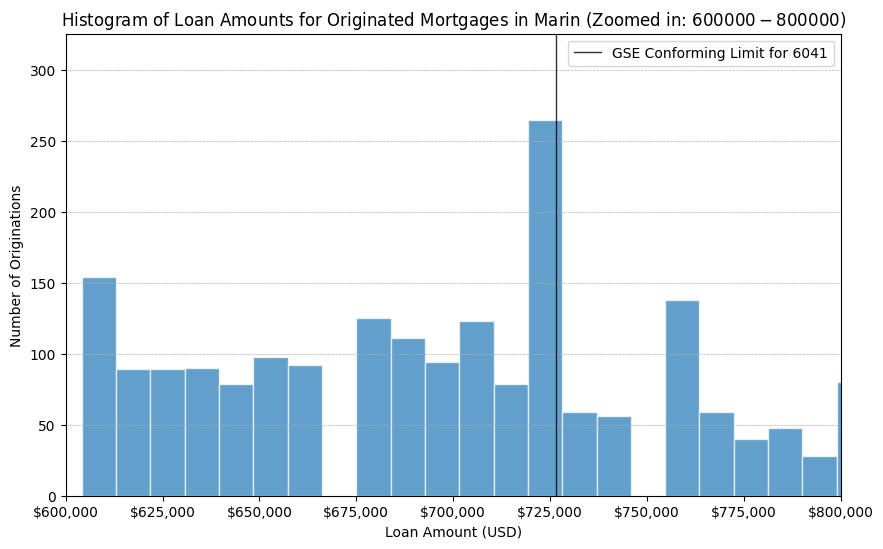

In [77]:
county_name = 6041 #type:int
county_name_str = county_name_map.get(county_name, "County not found")

filtered_df = mortgage_originations_2019[mortgage_originations_2019["county_code"] == county_name]
originated_loans = filtered_df[filtered_df["action_taken"] == 1]
loan_amounts = originated_loans["loan_amount"]
lower_bound = np.percentile(loan_amounts, 1)
upper_bound = np.percentile(loan_amounts, 99)
filtered_loan_amounts = loan_amounts[(loan_amounts >= lower_bound) & (loan_amounts <= upper_bound)]

bins =350

plt.figure(figsize=(10, 6))
plt.hist(filtered_loan_amounts, bins=bins, edgecolor="white", alpha=0.7, color="#1f77b4")

county_gse_limits = GSE_2019_loan_limits[GSE_2019_loan_limits["County Name"] == county_name_map.get(county_name)]["One-Unit Limit"].unique()
for limit in county_gse_limits:
    plt.axvline(limit, color="black", linestyle="solid", linewidth=1, alpha=0.8, 
                label=f"GSE Conforming Limit for {county_name}")
plt.legend(loc="upper right")

def currency_format(x, _):
    return f"${x:,.0f}"  

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))
upper_bound=800000
lower_bound=600000
plt.xlim(lower_bound, upper_bound)

plt.xlabel("Loan Amount (USD)")
plt.ylabel("Number of Originations")
plt.title(f"Histogram of Loan Amounts for Originated Mortgages in {county_name_str} (Zoomed in: ${lower_bound} - ${upper_bound})")

plt.grid(axis="y", linestyle="--", linewidth=0.5)

plt.show()


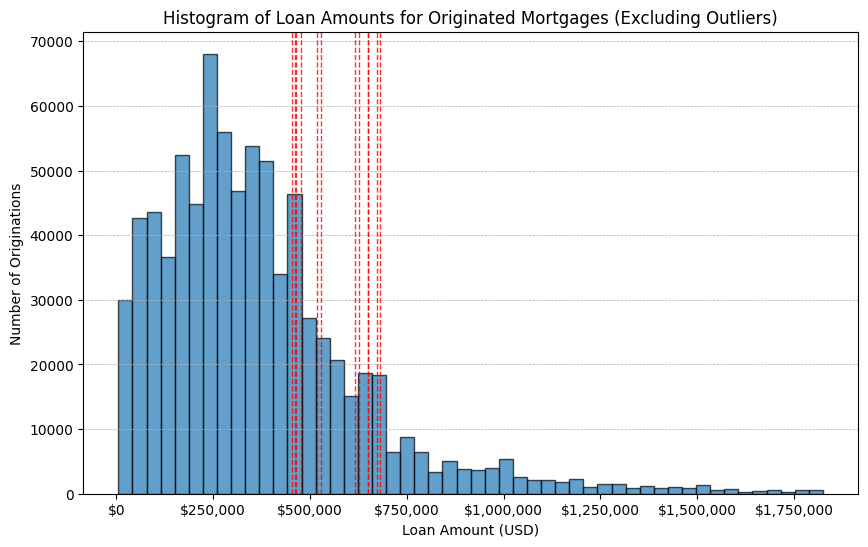

In [ ]:

df = single_unit_mortgage_originations_2018

originated_loans = df[df["action_taken"] == 1]

loan_amounts = originated_loans["loan_amount"]

lower_bound = np.percentile(loan_amounts, 1)
upper_bound = np.percentile(loan_amounts, 99)
filtered_loan_amounts = loan_amounts[(loan_amounts >= lower_bound) & (loan_amounts <= upper_bound)]

bins = 50  

plt.figure(figsize=(10, 6))
plt.hist(filtered_loan_amounts, bins=bins, edgecolor="black", alpha=0.7)

gse_limits = GSE_2018_loan_limits["One-Unit Limit"].unique()
for limit in gse_limits:
    plt.axvline(limit, color="red", linestyle="dashed", linewidth=1, alpha=0.8)

def currency_format(x, _):
    return f"${x:,.0f}"  

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

plt.xlabel("Loan Amount (USD)")
plt.ylabel("Number of Originations")
plt.title("Histogram of Loan Amounts for Originated Mortgages (Excluding Outliers)")

plt.grid(axis="y", linestyle="--", linewidth=0.5)

plt.show()


### Functions to Analyze Fire Risk

In [87]:
def analyze_fire_risk_by_significance(final_results_df, county_fire_risk_summary_2018_to_2021, year):
    """
    Compare fire risk scores between significant and non-significant counties for a given year at both 5% and 10% significance levels.

    Parameters:
    - final_results_df (pd.DataFrame): DataFrame containing significance results by county and year.
    - county_fire_risk_summary_2018_to_2021 (pd.DataFrame): DataFrame containing fire risk data aggregated by county and year.
    - year (int): The year to filter the dataset.

    Returns:
    - pd.DataFrame: A DataFrame containing statistical summaries and t-test results for both 5% and 10% significance levels.
    """
    yearly_results = final_results_df[final_results_df["Year"] == year]
    yearly_risk = county_fire_risk_summary_2018_to_2021[county_fire_risk_summary_2018_to_2021["year"] == year]

    yearly_risk = yearly_risk.rename(columns={"county": "County Name"})

    merged = yearly_results.merge(yearly_risk, on="County Name", how="inner")

    def compute_stats(df, label):
        return {
            "Group": label,
            "Mean Fire Risk": df["avg_fire_risk_score"].mean(),
            "Variance Fire Risk": df["avg_fire_risk_score"].var(),
            "Count": len(df)
        }

    results_list = []

    for alpha, label in [(0.05, "5%"), (0.10, "10%")]:
        significant_col = f"Significant at {label}"

        if significant_col not in merged.columns:
            continue

        significant = merged[merged[significant_col] == "Yes"]
        non_significant = merged[merged[significant_col] == "No"]

        if significant.empty or non_significant.empty:
            print(f"Not enough data for year {year} at {label} significance level.")
            continue

        sig_stats = compute_stats(significant, "Significant")
        non_sig_stats = compute_stats(non_significant, "Non-Significant")

        diff_mean = sig_stats["Mean Fire Risk"] - non_sig_stats["Mean Fire Risk"]
        diff_var = sig_stats["Variance Fire Risk"] - non_sig_stats["Variance Fire Risk"]
        t_stat, p_value = stats.ttest_ind(
            significant["avg_fire_risk_score"], 
            non_significant["avg_fire_risk_score"], 
            equal_var=False  # Welch’s t-test accounts for unequal variance
        )

        conclusion = (
            "Reject Null: Significant Difference" if p_value < alpha
            else "Fail to Reject Null: No Significant Difference"
        )

        results_list.extend([
            {
                "Year": year,
                "Significance Level": label,
                **sig_stats
            },
            {
                "Year": year,
                "Significance Level": label,
                **non_sig_stats
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "Difference (Significant - Non-Significant)",
                "Mean Fire Risk": diff_mean,
                "Variance Fire Risk": diff_var,
                "Count": None  
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "T-Test Result",
                "Mean Fire Risk": f"T-Stat: {t_stat:.4f}",
                "Variance Fire Risk": f"P-Value: {p_value:.4f}",
                "Count": conclusion
            }
        ])

    results_df = pd.DataFrame(results_list)

    print(f"\n=== Fire Risk Analysis for {year} ===")
    print(results_df.to_string(index=False))  
    
    return results_df  

In [88]:
def analyze_very_high_exposure_by_significance(final_results_df, county_fire_risk_summary_2018_to_2021, year):
    """
    Compare fire risk scores between significant and non-significant counties for a given year at both 5% and 10% significance levels.

    Parameters:
    - final_results_df (pd.DataFrame): DataFrame containing significance results by county and year.
    - county_fire_risk_summary_2018_to_2021 (pd.DataFrame): DataFrame containing fire risk data aggregated by county and year.
    - year (int): The year to filter the dataset.

    Returns:
    - pd.DataFrame: A DataFrame containing statistical summaries and t-test results for both 5% and 10% significance levels.
    """
    yearly_results = final_results_df[final_results_df["Year"] == year]
    yearly_risk = county_fire_risk_summary_2018_to_2021[county_fire_risk_summary_2018_to_2021["year"] == year]

    yearly_risk = yearly_risk.rename(columns={"county": "County Name"})

    merged = yearly_results.merge(yearly_risk, on="County Name", how="inner")

    def compute_stats(df, label):
        variance = df["sum_very_high_fire_risk"].var()
        return {
            "Group": label,
            "Total Houses Exposed to Very High Fire Risk": df["sum_very_high_fire_risk"].sum(),
            "Variance Very High Risk": variance,  
            "Count": len(df)
        }

    results_list = []

    for alpha, label in [(0.05, "5%"), (0.10, "10%")]:
        significant_col = f"Significant at {label}"

        if significant_col not in merged.columns:
            continue

        significant = merged[merged[significant_col] == "Yes"]
        non_significant = merged[merged[significant_col] == "No"]

        if significant.empty or non_significant.empty:
            print(f"Not enough data for year {year} at {label} significance level.")
            continue

        sig_stats = compute_stats(significant, "Significant")
        non_sig_stats = compute_stats(non_significant, "Non-Significant")

        diff_mean = sig_stats["Total Houses Exposed to Very High Fire Risk"] - non_sig_stats["Total Houses Exposed to Very High Fire Risk"]
        diff_var = sig_stats["Variance Very High Risk"] - non_sig_stats["Variance Very High Risk"]

        t_stat, p_value = stats.ttest_ind(
            significant["sum_very_high_fire_risk"], 
            non_significant["sum_very_high_fire_risk"], 
            equal_var=False  # Welch’s t-test accounts for unequal variance
        )

        conclusion = (
            "Reject Null: Significant Difference" if p_value < alpha
            else "Fail to Reject Null: No Significant Difference"
        )

        results_list.extend([
            {
                "Year": year,
                "Significance Level": label,
                **sig_stats,
                "Variance Very High Risk": round(sig_stats["Variance Very High Risk"], 3)  # Round for display
            },
            {
                "Year": year,
                "Significance Level": label,
                **non_sig_stats,
                "Variance Very High Risk": round(non_sig_stats["Variance Very High Risk"], 3)  # Round for display
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "Difference (Significant - Non-Significant)",
                "Total Houses Exposed to Very High Fire Risk": diff_mean,
                "Variance Very High Exposure": round(diff_var, 3),  # Now this won't be NaN
                "Count": None  
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "T-Test Result",
                "Total Houses Exposed to Very High Fire Risk": f"T-Stat: {t_stat:.4f}",
                "Variance Very High Exposure": f"P-Value: {p_value:.4f}",
                "Count": conclusion
            }
        ])

    results_df = pd.DataFrame(results_list)

    print(f"\n=== Fire Risk Analysis for {year} ===")
    print(results_df.to_string(index=False))  
    
    return results_df

In [89]:
def analyze_high_exposure_by_significance(final_results_df, county_fire_risk_summary_2018_to_2021, year):
    """
    Compare fire risk scores between significant and non-significant counties for a given year at both 5% and 10% significance levels.

    Parameters:
    - final_results_df (pd.DataFrame): DataFrame containing significance results by county and year.
    - county_fire_risk_summary_2018_to_2021 (pd.DataFrame): DataFrame containing fire risk data aggregated by county and year.
    - year (int): The year to filter the dataset.

    Returns:
    - pd.DataFrame: A DataFrame containing statistical summaries and t-test results for both 5% and 10% significance levels.
    """
    yearly_results = final_results_df[final_results_df["Year"] == year]
    yearly_risk = county_fire_risk_summary_2018_to_2021[county_fire_risk_summary_2018_to_2021["year"] == year]

    yearly_risk = yearly_risk.rename(columns={"county": "County Name"})

    merged = yearly_results.merge(yearly_risk, on="County Name", how="inner")

    def compute_stats(df, label):
        variance = df["sum_high_fire_risk"].var()
        return {
            "Group": label,
            "Total Houses Exposed to High Fire Risk": df["sum_high_fire_risk"].sum(),
            "Variance High Risk": variance,  # Store raw variance first
            "Count": len(df)
        }

    results_list = []

    for alpha, label in [(0.05, "5%"), (0.10, "10%")]:
        significant_col = f"Significant at {label}"

        if significant_col not in merged.columns:
            continue

        significant = merged[merged[significant_col] == "Yes"]
        non_significant = merged[merged[significant_col] == "No"]

        if significant.empty or non_significant.empty:
            print(f"Not enough data for year {year} at {label} significance level.")
            continue

        sig_stats = compute_stats(significant, "Significant")
        non_sig_stats = compute_stats(non_significant, "Non-Significant")

        # Compute differences before rounding
        diff_mean = sig_stats["Total Houses Exposed to High Fire Risk"] - non_sig_stats["Total Houses Exposed to High Fire Risk"]
        diff_var = sig_stats["Variance High Risk"] - non_sig_stats["Variance High Risk"]

        # Perform Welch’s t-test
        t_stat, p_value = stats.ttest_ind(
            significant["sum_high_fire_risk"], 
            non_significant["sum_high_fire_risk"], 
            equal_var=False  # Welch’s t-test accounts for unequal variance
        )

        conclusion = (
            "Reject Null: Significant Difference" if p_value < alpha
            else "Fail to Reject Null: No Significant Difference"
        )

        results_list.extend([
            {
                "Year": year,
                "Significance Level": label,
                **sig_stats,
                "Variance High Risk": round(sig_stats["Variance High Risk"], 3)  # Round for display
            },
            {
                "Year": year,
                "Significance Level": label,
                **non_sig_stats,
                "Variance High Risk": round(non_sig_stats["Variance High Risk"], 3)  # Round for display
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "Difference (Significant - Non-Significant)",
                "Total Houses Exposed to High Fire Risk": diff_mean,
                "Variance High Exposure": round(diff_var, 3),  # Now this won't be NaN
                "Count": None  
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "T-Test Result",
                "Total Houses Exposed to High Fire Risk": f"T-Stat: {t_stat:.4f}",
                "Variance High Exposure": f"P-Value: {p_value:.4f}",
                "Count": conclusion
            }
        ])

    results_df = pd.DataFrame(results_list)

    print(f"\n=== Fire Risk Analysis for {year} ===")
    print(results_df.to_string(index=False))  
    
    return results_df

In [90]:
def analyze_moderate_exposure_by_significance(final_results_df, county_fire_risk_summary_2018_to_2021, year):
    """
    Compare fire risk scores between significant and non-significant counties for a given year at both 5% and 10% significance levels.

    Parameters:
    - final_results_df (pd.DataFrame): DataFrame containing significance results by county and year.
    - county_fire_risk_summary_2018_to_2021 (pd.DataFrame): DataFrame containing fire risk data aggregated by county and year.
    - year (int): The year to filter the dataset.

    Returns:
    - pd.DataFrame: A DataFrame containing statistical summaries and t-test results for both 5% and 10% significance levels.
    """
    yearly_results = final_results_df[final_results_df["Year"] == year]
    yearly_risk = county_fire_risk_summary_2018_to_2021[county_fire_risk_summary_2018_to_2021["year"] == year]

    yearly_risk = yearly_risk.rename(columns={"county": "County Name"})

    merged = yearly_results.merge(yearly_risk, on="County Name", how="inner")

    def compute_stats(df, label):
        variance = df["sum_moderate_fire_risk"].var()
        return {
            "Group": label,
            "Total Houses Exposed to Moderate Fire Risk": df["sum_moderate_fire_risk"].sum(),
            "Variance Moderate Risk": variance,  # Store raw variance first
            "Count": len(df)
        }

    results_list = []

    for alpha, label in [(0.05, "5%"), (0.10, "10%")]:
        significant_col = f"Significant at {label}"

        if significant_col not in merged.columns:
            continue

        significant = merged[merged[significant_col] == "Yes"]
        non_significant = merged[merged[significant_col] == "No"]

        if significant.empty or non_significant.empty:
            print(f"Not enough data for year {year} at {label} significance level.")
            continue

        sig_stats = compute_stats(significant, "Significant")
        non_sig_stats = compute_stats(non_significant, "Non-Significant")

        # Compute differences before rounding
        diff_mean = sig_stats["Total Houses Exposed to Moderate Fire Risk"] - non_sig_stats["Total Houses Exposed to Moderate Fire Risk"]
        diff_var = sig_stats["Variance Moderate Risk"] - non_sig_stats["Variance Moderate Risk"]

        # Perform Welch’s t-test
        t_stat, p_value = stats.ttest_ind(
            significant["sum_moderate_fire_risk"], 
            non_significant["sum_moderate_fire_risk"], 
            equal_var=False  # Welch’s t-test accounts for unequal variance
        )

        conclusion = (
            "Reject Null: Significant Difference" if p_value < alpha
            else "Fail to Reject Null: No Significant Difference"
        )

        results_list.extend([
            {
                "Year": year,
                "Significance Level": label,
                **sig_stats,
                "Variance Moderate Risk": round(sig_stats["Variance Moderate Risk"], 3)  # Round for display
            },
            {
                "Year": year,
                "Significance Level": label,
                **non_sig_stats,
                "Variance Moderate Risk": round(non_sig_stats["Variance Moderate Risk"], 3)  # Round for display
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "Difference (Significant - Non-Significant)",
                "Total Houses Exposed to Moderate Fire Risk": diff_mean,
                "Variance Moderate Risk": round(diff_var, 3),  # Now this won't be NaN
                "Count": None  
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "T-Test Result",
                "Total Houses Exposed to Moderate Fire Risk": f"T-Stat: {t_stat:.4f}",
                "Variance Moderate Risk": f"P-Value: {p_value:.4f}",
                "Count": conclusion
            }
        ])

    results_df = pd.DataFrame(results_list)

    print(f"\n=== Fire Risk Analysis for {year} ===")
    print(results_df.to_string(index=False))  
    
    return results_df

In [94]:
def analyze_low_exposure_by_significance(final_results_df, county_fire_risk_summary_2018_to_2021, year):
    """
    Compare fire risk scores between significant and non-significant counties for a given year at both 5% and 10% significance levels.

    Parameters:
    - final_results_df (pd.DataFrame): DataFrame containing significance results by county and year.
    - county_fire_risk_summary_2018_to_2021 (pd.DataFrame): DataFrame containing fire risk data aggregated by county and year.
    - year (int): The year to filter the dataset.

    Returns:
    - pd.DataFrame: A DataFrame containing statistical summaries and t-test results for both 5% and 10% significance levels.
    """
    yearly_results = final_results_df[final_results_df["Year"] == year]
    yearly_risk = county_fire_risk_summary_2018_to_2021[county_fire_risk_summary_2018_to_2021["year"] == year]

    yearly_risk = yearly_risk.rename(columns={"county": "County Name"})

    merged = yearly_results.merge(yearly_risk, on="County Name", how="inner")

    def compute_stats(df, label):
        return {
            "Group": label,
            "Total Houses Exposed to Low Fire Risk": df["sum_low_fire_risk"].sum(),
            "Variance Low Risk": df["sum_low_fire_risk"].var(),
            "Count": len(df)
        }

    results_list = []

    for alpha, label in [(0.05, "5%"), (0.10, "10%")]:
        significant_col = f"Significant at {label}"

        if significant_col not in merged.columns:
            continue

        significant = merged[merged[significant_col] == "Yes"]
        non_significant = merged[merged[significant_col] == "No"]

        if significant.empty or non_significant.empty:
            print(f"Not enough data for year {year} at {label} significance level.")
            continue

        sig_stats = compute_stats(significant, "Significant")
        non_sig_stats = compute_stats(non_significant, "Non-Significant")

        diff_mean = sig_stats["Total Houses Exposed to Low Fire Risk"] - non_sig_stats["Total Houses Exposed to Low Fire Risk"]
        diff_var = sig_stats["Variance Low Risk"] - non_sig_stats["Variance Low Risk"]
        t_stat, p_value = stats.ttest_ind(
            significant["sum_low_fire_risk"], 
            non_significant["sum_low_fire_risk"], 
            equal_var=False  # Welch’s t-test accounts for unequal variance
        )

        conclusion = (
            "Reject Null: Significant Difference" if p_value < alpha
            else "Fail to Reject Null: No Significant Difference"
        )

        results_list.extend([
            {
                "Year": year,
                "Significance Level": label,
                **sig_stats
            },
            {
                "Year": year,
                "Significance Level": label,
                **non_sig_stats
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "Difference (Significant - Non-Significant)",
                "Total Houses Exposed to Low Fire Risk": diff_mean,
                "Variance Low Exposure": round(diff_var, 3),
                "Count": None  
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "T-Test Result",
                "Total Houses Exposed to Low Fire Risk": f"T-Stat: {t_stat:.4f}",
                "Variance Low Exposure": f"P-Value: {p_value:.4f}",
                "Count": conclusion
            }
        ])

    results_df = pd.DataFrame(results_list)

    print(f"\n=== Fire Risk Analysis for {year} ===")
    print(results_df.to_string(index=False))  
    
    return results_df  

In [95]:
def analyze_negligible_exposure_by_significance(final_results_df, county_fire_risk_summary_2018_to_2021, year):
    """
    Compare fire risk scores between significant and non-significant counties for a given year at both 5% and 10% significance levels.

    Parameters:
    - final_results_df (pd.DataFrame): DataFrame containing significance results by county and year.
    - county_fire_risk_summary_2018_to_2021 (pd.DataFrame): DataFrame containing fire risk data aggregated by county and year.
    - year (int): The year to filter the dataset.

    Returns:
    - pd.DataFrame: A DataFrame containing statistical summaries and t-test results for both 5% and 10% significance levels.
    """
    yearly_results = final_results_df[final_results_df["Year"] == year]
    yearly_risk = county_fire_risk_summary_2018_to_2021[county_fire_risk_summary_2018_to_2021["year"] == year]

    yearly_risk = yearly_risk.rename(columns={"county": "County Name"})

    merged = yearly_results.merge(yearly_risk, on="County Name", how="inner")

    def compute_stats(df, label):
        return {
            "Group": label,
            "Total Houses Exposed to Negligible Fire Risk": df["sum_negligible_fire_risk"].sum(),
            "Variance Negligible Risk": df["sum_negligible_fire_risk"].var(),
            "Count": len(df)
        }

    results_list = []

    for alpha, label in [(0.05, "5%"), (0.10, "10%")]:
        significant_col = f"Significant at {label}"

        if significant_col not in merged.columns:
            continue

        significant = merged[merged[significant_col] == "Yes"]
        non_significant = merged[merged[significant_col] == "No"]

        if significant.empty or non_significant.empty:
            print(f"Not enough data for year {year} at {label} significance level.")
            continue

        sig_stats = compute_stats(significant, "Significant")
        non_sig_stats = compute_stats(non_significant, "Non-Significant")

        diff_mean = sig_stats["Total Houses Exposed to Negligible Fire Risk"] - non_sig_stats["Total Houses Exposed to Negligible Fire Risk"]
        diff_var = sig_stats["Variance Negligible Risk"] - non_sig_stats["Variance Negligible Risk"]
        t_stat, p_value = stats.ttest_ind(
            significant["sum_negligible_fire_risk"], 
            non_significant["sum_negligible_fire_risk"], 
            equal_var=False  # Welch’s t-test accounts for unequal variance
        )

        conclusion = (
            "Reject Null: Significant Difference" if p_value < alpha
            else "Fail to Reject Null: No Significant Difference"
        )

        results_list.extend([
            {
                "Year": year,
                "Significance Level": label,
                **sig_stats
            },
            {
                "Year": year,
                "Significance Level": label,
                **non_sig_stats
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "Difference (Significant - Non-Significant)",
                "Total Houses Exposed to Negligible Fire Risk": diff_mean,
                "Variance Negligible Exposure": diff_var,
                "Count": None  
            },
            {
                "Year": year,
                "Significance Level": label,
                "Group": "T-Test Result",
                "Total Houses Exposed to Negligible Fire Risk": f"T-Stat: {t_stat:.4f}",
                "Variance Negligible Exposure": f"P-Value: {p_value:.4f}",
                "Count": conclusion
            }
        ])

    results_df = pd.DataFrame(results_list)

    print(f"\n=== Fire Risk Analysis for {year} ===")
    print(results_df.to_string(index=False))  
    
    return results_df  

In [96]:
def compare_fire_risk_exposures(final_results_df, county_fire_risk_summary_2018_to_2021, year):
    """
    Calls all fire risk analysis functions and consolidates their results into a single table.
    
    Parameters:
    - final_results_df (pd.DataFrame): DataFrame containing significance results by county and year.
    - county_fire_risk_summary_2018_to_2021 (pd.DataFrame): DataFrame containing fire risk data aggregated by county and year.
    - year (int): The year to filter the dataset.
    
    Returns:
    - pd.DataFrame: A consolidated DataFrame for comparison.
    """
    
    risk_categories = {
        "Fire Risk Score": (analyze_fire_risk_by_significance, "Mean Fire Risk", "Variance Fire Risk"),
        "Sum Negligible Risk": (analyze_negligible_exposure_by_significance, "Total Houses Exposed to Negligible Fire Risk", "Variance Negligible Risk"),
        "Sum Low Risk": (analyze_low_exposure_by_significance, "Total Houses Exposed to Low Fire Risk", "Variance Low Risk"),
        "Sum Moderate Risk": (analyze_moderate_exposure_by_significance, "Total Houses Exposed to Moderate Fire Risk", "Variance Moderate Risk"),
        "Sum High Risk": (analyze_high_exposure_by_significance, "Total Houses Exposed to High Fire Risk", "Variance High Risk"),
        "Sum Very High Risk": (analyze_very_high_exposure_by_significance, "Total Houses Exposed to Very High Fire Risk", "Variance Very High Risk"),
    }
    
    results_list = []
    
    for risk_measure, (func, exposure_col, variance_col) in risk_categories.items():
        result_df = func(final_results_df, county_fire_risk_summary_2018_to_2021, year)
        
        if variance_col not in result_df.columns:
            print(f"Warning: '{variance_col}' is missing in result_df for {risk_measure}. Skipping...")
            continue
        
        significant_row = result_df[result_df["Group"] == "Significant"]
        non_significant_row = result_df[result_df["Group"] == "Non-Significant"]
        difference_row = result_df[result_df["Group"] == "Difference (Significant - Non-Significant)"]
        p_value_row = result_df[result_df["Group"] == "T-Test Result"]
        
        significant_value = significant_row[exposure_col].values[0] if not significant_row.empty else None
        non_significant_value = non_significant_row[exposure_col].values[0] if not non_significant_row.empty else None
        
        if significant_value is not None and non_significant_value is not None:
            difference_value = significant_value - non_significant_value
        else:
            difference_value = difference_row[exposure_col].values[0] if not difference_row.empty else None
        
        p_value = None
        if not p_value_row.empty and "P-Value" in p_value_row.columns:
            extracted_p_value = p_value_row["P-Value"].astype(str).str.extract(r'([0-9]*\.?[0-9]+)')
            p_value = float(extracted_p_value.dropna().values[0][0]) if not extracted_p_value.dropna().empty else None
        
        significance_result = "Significant Difference" if p_value is not None and p_value < 0.05 else "No Significant Difference"
        
        results_list.append({
            "Risk Measure": risk_measure,
            "Significance Level": significant_row["Significance Level"].values[0] if not significant_row.empty else None,
            "Significant Group": significant_value,
            "Non-Significant Group": non_significant_value,
            "Difference": difference_value,
            "P-Value": p_value,
            "Significance Result": significance_result,
            "Year": year
        })

In [97]:
compare_fire_risk_exposures(final_results_df, county_fire_risk_summary_2018_to_2021, 2021)



=== Fire Risk Analysis for 2021 ===
 Year Significance Level                                      Group Mean Fire Risk Variance Fire Risk                                          Count
 2021                 5%                                Significant        1.30032           0.733428                                              4
 2021                 5%                            Non-Significant       1.150608           0.530867                                             50
 2021                 5% Difference (Significant - Non-Significant)       0.149713           0.202562                                           None
 2021                 5%                              T-Test Result T-Stat: 0.3399    P-Value: 0.7541 Fail to Reject Null: No Significant Difference

=== Fire Risk Analysis for 2021 ===
 Year Significance Level                                      Group Total Houses Exposed to Negligible Fire Risk  Variance Negligible Risk                                          C

In [98]:
compare_fire_risk_exposures(final_results_df, county_fire_risk_summary_2018_to_2021, 2020)



=== Fire Risk Analysis for 2020 ===
 Year Significance Level                                      Group  Mean Fire Risk Variance Fire Risk                               Count
 2020                 5%                                Significant         0.81706           0.305068                                  16
 2020                 5%                            Non-Significant        1.288116           0.565281                                  37
 2020                 5% Difference (Significant - Non-Significant)       -0.471056          -0.260213                                None
 2020                 5%                              T-Test Result T-Stat: -2.5418    P-Value: 0.0152 Reject Null: Significant Difference

=== Fire Risk Analysis for 2020 ===
 Year Significance Level                                      Group Total Houses Exposed to Negligible Fire Risk  Variance Negligible Risk                               Count Variance Negligible Exposure
 2020                 5%   

In [99]:
compare_fire_risk_exposures(final_results_df, county_fire_risk_summary_2018_to_2021, 2019)



=== Fire Risk Analysis for 2019 ===
 Year Significance Level                                      Group  Mean Fire Risk Variance Fire Risk                               Count
 2019                 5%                                Significant         0.72649            0.14452                                  11
 2019                 5%                            Non-Significant        1.343158           0.654771                                  38
 2019                 5% Difference (Significant - Non-Significant)       -0.616668          -0.510251                                None
 2019                 5%                              T-Test Result T-Stat: -3.5386    P-Value: 0.0011 Reject Null: Significant Difference

=== Fire Risk Analysis for 2019 ===
 Year Significance Level                                      Group Total Houses Exposed to Negligible Fire Risk  Variance Negligible Risk                               Count Variance Negligible Exposure
 2019                 5%   